In [71]:
#Portfolio allocation and definition

import pandas as pd
import quandl

In [4]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2020-01-01')

In [7]:
AAPL = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
CISCO = quandl.get('WIKI/CSCO.11', start_date = start, end_date = end)
IBM = quandl.get('WIKI/IBM.11', start_date = start, end_date = end)
AMZN = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)

In [8]:
AAPL

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


In [10]:
AAPL.iloc[0]['Adj. Close']

52.848786580038

In [15]:
#Cummulative return
for stock_df in (AAPL,CISCO,IBM,AMZN):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / (stock_df.iloc[0]['Adj. Close'])

In [16]:
AAPL.tail()

,Adj. Close,Normed Return
Date,,
2018-03-21,171.270,3.240756
2018-03-22,168.845,3.194870
2018-03-23,164.940,3.120980
2018-03-26,172.770,3.269138
2018-03-27,168.340,3.185314


In [18]:
#Now for allocations:
#30% in AAPL, 20% in CISCO, 40% in AMAZON 10% in IBM

In [23]:
#This is what this does - list of tuples
list(zip((AAPL,CISCO,IBM,AMZN),[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   52.848787       1.000000
  2012-01-04   53.132802       1.005374
  2012-01-05   53.722681       1.016536
  2012-01-06   54.284287       1.027162
  2012-01-09   54.198183       1.025533
  ...                ...            ...
  2018-03-21  171.270000       3.240756
  2018-03-22  168.845000       3.194870
  2018-03-23  164.940000       3.120980
  2018-03-26  172.770000       3.269138
  2018-03-27  168.340000       3.185314
  
  [1566 rows x 2 columns],
  0.3),
 (            Adj. Close  Normed Return
  Date                                 
  2012-01-03   15.617341       1.000000
  2012-01-04   15.919125       1.019324
  2012-01-05   15.860445       1.015566
  2012-01-06   15.801764       1.011809
  2012-01-09   15.902359       1.018250
  ...                ...            ...
  2018-03-21   44.310000       2.837231
  2018-03-22   43.070000       2.757832
  2018-03-23   42.420000       2.716211
  

In [24]:
for stock_df, allo in zip((AAPL,CISCO,IBM,AMZN),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [25]:
#Investigate how allocation is 'allo' and money is mulitplied!
AAPL.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [26]:
for stock_df in (AAPL,CISCO,IBM,AMZN):
    stock_df['My position'] = stock_df['Allocation']*1000000

In [31]:
#Gives my position
AAPL.head()

,Adj. Close,Normed Return,Allocation,My position
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [32]:
#For full portfolio:
all_pos_vals = [AAPL['My position'],CISCO['My position'],IBM['My position'],AMZN['My position']]

portfolio_value = pd.concat(all_pos_vals, axis = 1)

In [33]:
portfolio_value.head()

,My position,My position,My position,My position
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [36]:
#Change columns
portfolio_value.columns = ('AAPL Position', 'CISCO Position', 'IBM Position', 'AMZN Position')

In [37]:
portfolio_value.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [38]:
# Make a total value column
portfolio_value['Total Position'] = portfolio_value.sum(axis=1)

In [53]:
portfolio_value.idxmin(axis=0)

AAPL Position    2013-04-19
CISCO Position   2012-07-24
IBM Position     2016-02-11
AMZN Position    2012-01-12
Total Position   2017-08-07
dtype: datetime64[ns]

In [58]:
portfolio_value.loc['2017-08-07']
#A few NaN values here...
#Explains why massive drop in subsequent plot

AAPL Position               NaN
CISCO Position    404246.154464
IBM Position      356822.020564
AMZN Position               NaN
Total Position    761068.175028
Name: 2017-08-07 00:00:00, dtype: float64

In [67]:
portfolio_value.dropna(axis=0, inplace=True)

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Position')

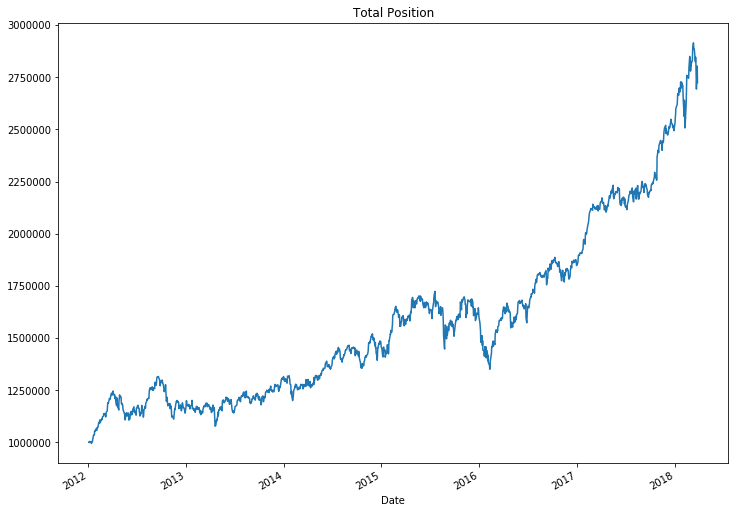

In [69]:
portfolio_value['Total Position'].plot(figsize=(12,9))
plt.title('Total Position')

Text(0.5, 1.0, 'Individual Positions')

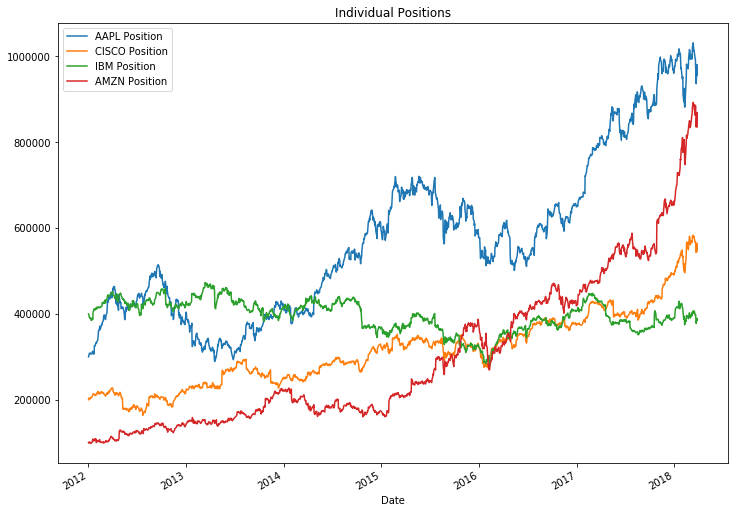

In [70]:
portfolio_value.drop('Total Position', axis=1).plot(figsize=(12,9))
plt.title('Individual Positions')

In [72]:
#Now for daily returns etc
portfolio_value['Daily Return'] = portfolio_value['Total Position'].pct_change(1)

In [75]:
portfolio_value.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position,Total Position,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


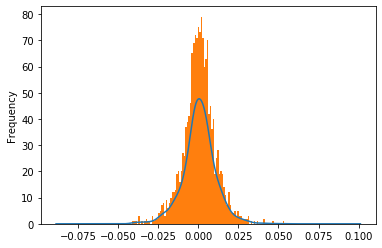

In [78]:
portfolio_value['Daily Return'].plot(kind='kde')
portfolio_value['Daily Return'].plot(kind='hist',bins=100)

In [83]:
cummulative_return = 100*(portfolio_value['Total Position'][-1]/portfolio_value['Total Position'][0] - 1)

In [84]:
cummulative_return

172.39781738780346

In [85]:
#Sharpe ratio
#Mean portfolio return - risk free return (=0) all over the std
#Need to multiply this by sqrt(252) -> daily vs yearly
SR = portfolio_value['Daily Return'].mean()/portfolio_value['Daily Return'].std()

In [87]:
SR

0.06709248252519531

In [89]:
#Annualised Sharpe ratio
#SR above 1 is good, 2 is very good and 3 is amazing
(252**0.5)*SR

1.0650601416216818

In [2]:
#We can now run Monte Carlo simulations (i.e. guess and check for various randomly generated allocations!)
#We can then minimize the (negative) sharpe ratio!